## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# I am continuing my analysis from my EDA project
# This data set contains nearly 130,000 customer interviews
df = pd.read_csv("airline_satisfaction_full.csv")

In [3]:
# All 14 ranked categories
passRatings = ["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding",
               "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service",
               "Inflight service", "Cleanliness"]

# Categories that can be addressed by investing in in-fight services
inFlight = ["Inflight wifi service", "Food and drink", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
            "Inflight service", "Cleanliness"]

# Categories that can be addressed by investing in mobile app
app = ["Ease of Online booking", "Online boarding", "Inflight entertainment", "Checkin service"]

# Categories that can be addressed by investing in plane infrastructure
plane = ["Inflight wifi service", "Seat comfort", "Leg room service"]

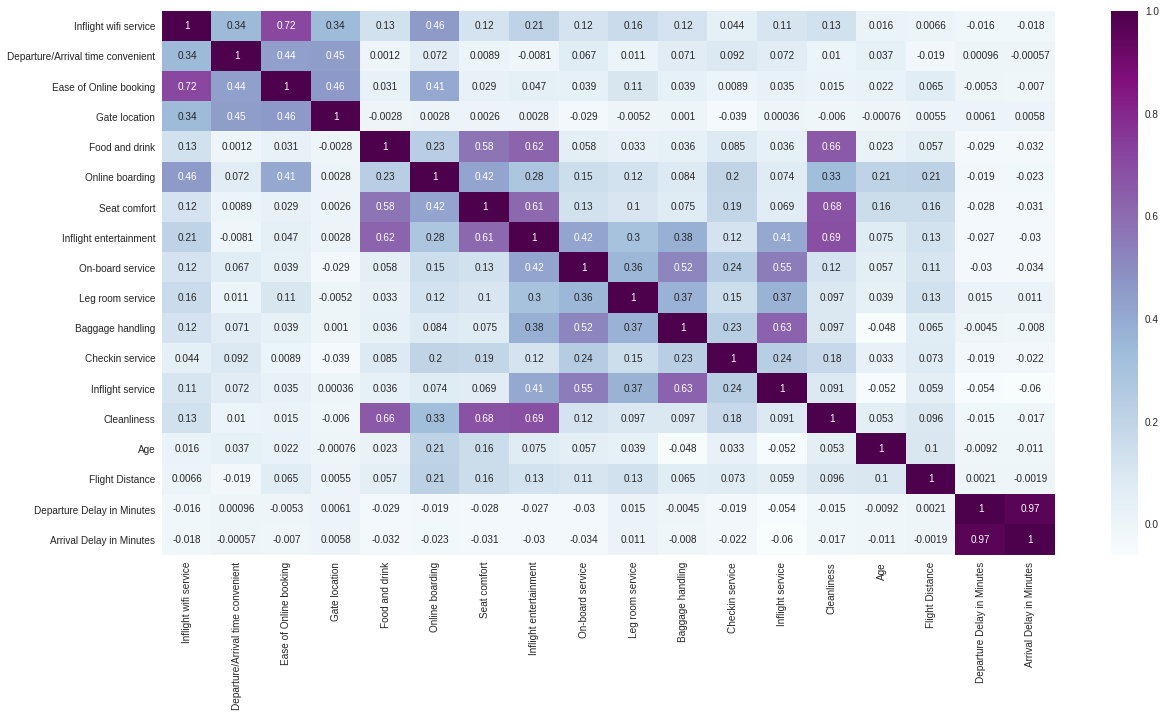

In [4]:
# some additional EDA to undertand correlations between numeric data
import seaborn as sns    
import matplotlib.pyplot as plt
plt.figure(figsize= (20, 10))
sns.heatmap(df.corr(),annot= True, cmap="BuPu")

In [5]:
# Preparing data (using dummy variables and splitting into test/train)
X_dummy = df.iloc[:, :22]

X = pd.get_dummies(X_dummy)
y = df.loc[:, "satisfaction"]

# split into testing and training, 20% in testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[11804  2825]
 [ 1965  9225]]


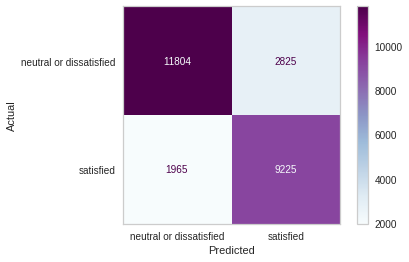

Logistic Regression Accuracy: 0.8144777102134088


In [60]:
#LOGISTIC REGRESSION MODEL

# build the model
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

# predict satisfaction outcomes
y_pred_log_reg = logReg.predict(X_test)

# print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log_reg)
print(cnf_matrix)
metrics.plot_confusion_matrix(logReg, X_test, y_test, values_format = '.0f', cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

# model accuracy and confusion matrix
print('Logistic Regression Accuracy:', metrics.accuracy_score(y_test, y_pred_log_reg))




[[13577  1052]
 [ 1458  9732]]
Training Accuracy: 0.9059017187121762
Decision Tree Testing Accuracy: 0.9027847709051474


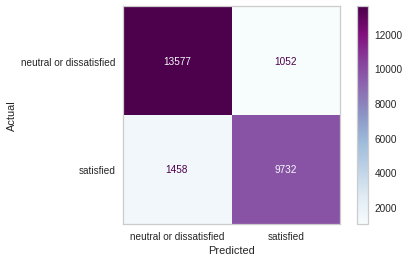

In [61]:
# DECISION TREE MODEL

# build decision tree model
dt = DecisionTreeClassifier(criterion='entropy', max_depth =  5)
dt.fit(X_train, y_train)

# predict satisfaction
y_pred_decision_tree = dt.predict(X_test)

# print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_decision_tree)
print(cnf_matrix)
metrics.plot_confusion_matrix(dt, X_test, y_test, values_format = '.0f', cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)

# y predictions from training data
y_pred_train_dt = dt.predict(X_train)

print('Training Accuracy:', metrics.accuracy_score(y_train, y_pred_train_dt))
print('Decision Tree Testing Accuracy:', metrics.accuracy_score(y_test, y_pred_decision_tree))


In [65]:
# RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestClassifier

model_rf_oob = RandomForestClassifier(n_estimators=100, max_features=5, oob_score=True, random_state=42).fit(X_train, y_train)
acc_oob = accuracy_score(y_test, model_rf_oob.predict(X_test))

# predict satisfaction using the random forest model
y_pred_random_forest = model_rf_oob.predict(X_test)

# Random Forest Accuracy
print('Random Forest Accuracy:', acc_oob)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_random_forest)
print(cnf_matrix)
metrics.plot_confusion_matrix(model_rf_oob, X_test, y_test, values_format = '.0f', cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

KeyboardInterrupt: ignored

                             features  importance
5                     Online boarding    0.161489
0               Inflight wifi service    0.148843
24                     Class_Business    0.083984
23     Type of Travel_Personal Travel    0.058814
22     Type of Travel_Business travel    0.051548
7              Inflight entertainment    0.048719
6                        Seat comfort    0.043811
2              Ease of Online booking    0.036352
25                          Class_Eco    0.031705
9                    Leg room service    0.030554
10                   Baggage handling    0.028633
20       Customer Type_Loyal Customer    0.027941
15                    Flight Distance    0.027586
14                                Age    0.027503
12                   Inflight service    0.026995
11                    Checkin service    0.026527
8                    On-board service    0.025492
13                        Cleanliness    0.023932
21    Customer Type_disloyal Customer    0.022715


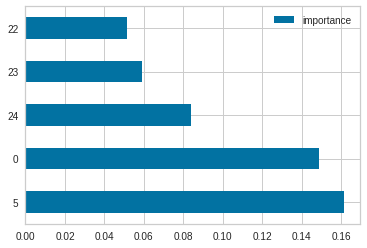

In [94]:
# Top 3 features for RandomForest

feature_importances = model_rf_oob.feature_importances_
features = X_train.columns
imp = pd.DataFrame({'features': features, 'importance': feature_importances})

imp = imp.sort_values(by=["importance"], ascending = False)
print(imp)


imp.head(5).plot(kind="barh")

[[14289   340]
 [  731 10459]]


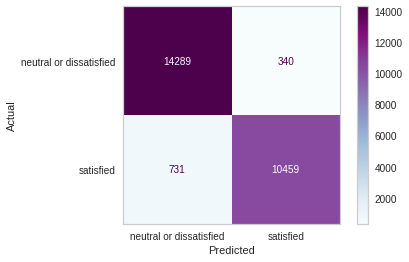

Adaboost Accuracy:  0.9585


In [62]:
# ADABOOST MODEL

base_est = DecisionTreeClassifier (max_depth = 4)
ada_boost1 = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost1.fit(X_train, y_train)

pred_adaboost = ada_boost1.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, pred_adaboost)
print(cnf_matrix)
metrics.plot_confusion_matrix(ada_boost1, X_test, y_test, values_format = '.0f', cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

print("Adaboost Accuracy: ", round(accuracy_score(y_test, pred_adaboost),4))

[[14304   325]
 [  709 10481]]


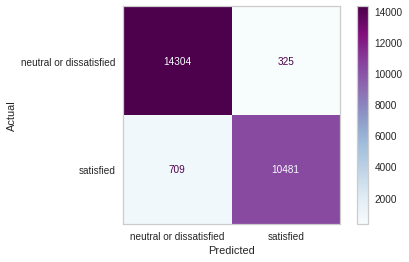

Bagging Model Accuracy =  0.9599519733529571


In [63]:
# GENERIC BAGGING MODEL

base_est = DecisionTreeClassifier

model_bagging = BaggingClassifier(random_state = 42, n_estimators=10)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

cnf_matrix = metrics.confusion_matrix(y_test, pred_bagging)
print(cnf_matrix)
metrics.plot_confusion_matrix(model_bagging, X_test, y_test, values_format = '.0f', cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

print('Bagging Model Accuracy = ', acc_bagging)

[[14276   353]
 [  721 10469]]


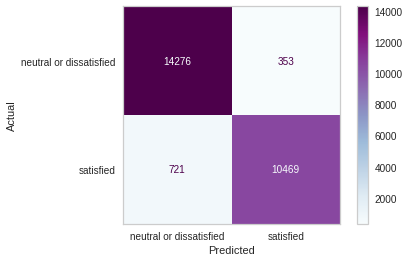

Gradient Boosting Classifier Accuracy: 0.9584


In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=150, random_state=42, learning_rate=0.3).fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, gbc_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(gbc, X_test, y_test, values_format = '.0f', cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

print('Gradient Boosting Classifier Accuracy:', round(accuracy_score(y_test, gbc_pred), 5))

In [57]:
print('Logistic Regression Accuracy:', round(metrics.accuracy_score(y_test, y_pred_log_reg),4))
print('Decision Tree Accuracy:', round(metrics.accuracy_score(y_test, y_pred_decision_tree), 4))
print('Random Forest Accuracy:', round(acc_oob, 4))
print("Adaboost Accuracy: ", round(accuracy_score(y_test, pred_adaboost),4))
print('Bagging Model Accuracy: ', round(acc_bagging, 4))
print('Gradient Boosting Classifier Accuracy:', round(accuracy_score(y_test, gbc_pred), 5))

Logistic Regression Accuracy: 0.8145
Decision Tree Accuracy: 0.9028
Random Forest Accuracy: 0.9635
Adaboost Accuracy:  0.9585
Bagging Model Accuracy:  0.96
Gradient Boosting Classifier Accuracy: 0.9584


Text(0.5, 1.0, 'Initial Model Accuracies')

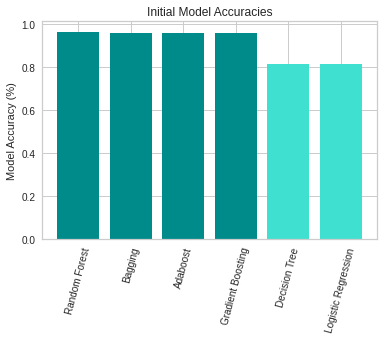

In [59]:
# display initial model accuracies

acc = {u'Random Forest':0.9635, u'Bagging':0.9585, u'Adaboost': 0.9585, u'Gradient Boosting':0.9584, 
       u'Decision Tree':0.8145, u'Logistic Regression':0.8145}

plt.bar(range(len(acc)), list(acc.values()), align='center', color=['darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'turquoise', 'turquoise'])
plt.xticks(range(len(acc)), list(acc.keys()))
plt.xticks(rotation = 75)
plt.ylabel("Model Accuracy (%)")
plt.title("Initial Model Accuracies")


In [ ]:
# Three most promising models are random forest, adaboost and bagging
# I will try simple methods at first to improve their accuracy

In [14]:
# Random Forest Improvements
# Model 2 (more estimators)
model_rf_oob2 = RandomForestClassifier(n_estimators=250, max_features=10, oob_score=True, random_state=42).fit(X_train, y_train)
acc_oob2 = accuracy_score(y_test, model_rf_oob.predict(X_test))

# Model 3 (fewer estimators)
model_rf_oob3 = RandomForestClassifier(n_estimators=50, max_features=10, oob_score=True, random_state=42).fit(X_train, y_train)
acc_oob3 = accuracy_score(y_test, model_rf_oob.predict(X_test))


print('Random Forest #2 Accuracy:', round(acc_oob2, 6))
print('Random Forest #3 Accuracy:', round(acc_oob3, 6))


Random Forest #2 Accuracy: 0.9648
Random Forest #3 Accuracy: 0.9648


In [16]:
# Bagging Improvements

# Model 2 (more estimators)
model_bagging2 = BaggingClassifier(random_state = 42, n_estimators=15, warm_start=False)
model_bagging2.fit(X_train, y_train)
pred_bagging2 = model_bagging2.predict(X_test)
acc_bagging2 = accuracy_score(y_test, pred_bagging)

# Model 3 (fewer estimators)
model_bagging3 = BaggingClassifier(random_state = 42, n_estimators=5, warm_start=True)
model_bagging3.fit(X_train, y_train)
pred_bagging3 = model_bagging3.predict(X_test)
acc_bagging3 = accuracy_score(y_test, pred_bagging)

print('Bagging Model #2 Accuracy: ', round(acc_bagging2, 6))
print('Bagging Model #3 Accuracy: ', round(acc_bagging3, 6))

Bagging Model #2 Accuracy:  0.959952
Bagging Model #3 Accuracy:  0.959952


In [19]:
# Adaboost Improvements

# boost max depth from 4 to 8

# model 2 (more estimators, lower learning rate)
# ideally, there will be more models used, and they will each have less impact on the final model
# this is a "volume" approach
base_est = DecisionTreeClassifier (max_depth = 8)
ada_boost2 = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.02)
ada_boost2.fit(X_train, y_train)
pred_adaboost2 = ada_boost2.predict(X_test)

# model 3 (fewer estimators, higher learning rate)
# ideally, there will be fewer models used, and they will each have more impact on the final model
# this is a "quality over quantity" approach
base_est3 = DecisionTreeClassifier (max_depth = 8)
ada_boost3 = AdaBoostClassifier(base_est, n_estimators=25, random_state=42, learning_rate=.1)
ada_boost3.fit(X_train, y_train)
pred_adaboost3 = ada_boost3.predict(X_test)

print("Adaboost #2 Accuracy: ", round(accuracy_score(y_test, pred_adaboost2),6))
print("Adaboost #3 Accuracy: ", round(accuracy_score(y_test, pred_adaboost3),6))

Adaboost #2 Accuracy:  0.964096
Adaboost #3 Accuracy:  0.962353


In [ ]:
# Despite my simple improvements, my random forest model is still providing the best accuracy
# I will choose this model for further tuning and simplification to try and boost accuracy even more

In [35]:
# RANDOM FOREST MODEL with improvements

model_rf_oob4 = RandomForestClassifier(n_estimators=100, max_features=7, oob_score=True, random_state=42).fit(X_train, y_train)
acc_oob4 = accuracy_score(y_test, model_rf_oob4.predict(X_test))

# predict satisfaction using the random forest model
y_pred_random_forest4 = model_rf_oob4.predict(X_test)

# Random Forest Accuracy
print('Random Forest #4 Accuracy:', round(acc_oob4, 5))



model_rf_oob5 = RandomForestClassifier(criterion = "entropy", n_estimators=100, max_features="log2", oob_score=True, random_state=42).fit(X_train, y_train)
acc_oob5 = accuracy_score(y_test, model_rf_oob5.predict(X_test))

# predict satisfaction using the random forest model
y_pred_random_forest5 = model_rf_oob5.predict(X_test)

# Random Forest Accuracy
print('Random Forest #5 Accuracy:', round(acc_oob5, 5))


# cnf_matrix = metrics.confusion_matrix(y_test, y_pred_random_forest)
# print(cnf_matrix)
# metrics.plot_confusion_matrix(model_rf_oob, X_test, y_test, values_format = '.0f')
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.grid(False)
# plt.show()

Random Forest Accuracy: 0.96475
Random Forest Accuracy: 0.96224


In [ ]:
# Grid search with random forest

from sklearn.model_selection import GridSearchCV

model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

# create random forest classifier model
rf_model_grid = RandomForestClassifier(random_state=42)

# set up grid search meta-estimator
clf_grid = GridSearchCV(rf_model_grid, model_params, cv=5)

# train the grid search meta-estimator to find the best model
rf_grid = clf_grid.fit(X, y)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())


In [39]:
# GRID SEARCH WINNER: 150 estimators, 0.25 max features, 6 min samples split

model_rf_oob6 = RandomForestClassifier(n_estimators=150, max_features=0.25, min_samples_split=6, random_state=42).fit(X_train, y_train)
acc_oob6 = accuracy_score(y_test, model_rf_oob6.predict(X_test))

# predict satisfaction using the random forest model
y_pred_random_forest6 = model_rf_oob6.predict(X_test)

# Random Forest Accuracy
print('\"Grid Search Winner\" Forest Accuracy:', round(acc_oob6, 5))

Grid Search Winner Forest Accuracy: 0.96379


In [102]:
# Simplifying My Random Forest to Prevent Overfit
# siplifications include: 100 fewer estimators, 300 min samples for a split, and 3 fewer max features
# Since there are 130k rows of data, it is important that a substantial number of samples
#   are present for a split to occur. 300 preserved accuracy while also boositng adaptability

# Accuracy only decreased by 1.4%, which is acceptable given the boost in adaptability

# RANDOM FOREST MODEL with improvements

model_rf_oob4 = RandomForestClassifier(min_samples_split=300, n_estimators=50, max_features=4, oob_score=True, random_state=42).fit(X_train, y_train)
acc_oob4 = accuracy_score(y_test, model_rf_oob4.predict(X_test))

# predict satisfaction using the random forest model
y_pred_random_forest4 = model_rf_oob4.predict(X_test)

# Random Forest Accuracy
print('Random Forest Accuracy:', round(acc_oob4, 5))

Random Forest Accuracy: 0.95085


In [ ]:
# Comparing to BENCHMARKS
# My 3 main Random Forest Models:

# First iteration: Accuracy = 96.35%
# Best iteration: Accuracy = 96.48%
# Simplified iteration: Accuracy = 95.10%

# Overall, compared to my initial benchmark, I'm satisifed with my models performance
#   and feel that the simplified iteration is now robust enough to accomodate new data
#   without having to worry about overfit